<a href="https://colab.research.google.com/github/Harikrishnancse/Plant-Species-Recognition-Using-CNN/blob/master/MY_CNN_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MY PROJECT CNN CODING**

In [ ]:
### import necessary packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import keras
from keras import models
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D
from keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [ ]:
### mount the google drive into colab

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
### data set path in my google drive
dir_path = '/content/drive/My Drive/Dataset1'
categories = ['Barberry','Chinese Redbud','Ginkgo','Oleander','Tangerine']

SIZE = 180

dataset = []

### read the leaf images from google drive 
### convert them into grayscale iamges
### then resize all images into 180 X 180 

for i in categories:
  count = 0 
  path= dir_path+'/train/'+ i
  for img in os.listdir(path):
      img_array =  cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array , (SIZE,SIZE))
      dataset.append([new_array ,i])
      count+=1
  print("\n no of "+ i + " images : ",count)
    
print("\n total no of  images :",len(dataset))



 no of Barberry images :  54

 no of Chinese Redbud images :  71

 no of Ginkgo images :  61

 no of Oleander images :  65

 no of Tangerine images :  55

 total no of  images : 306


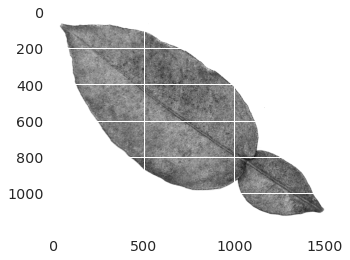

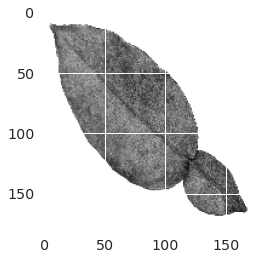

In [ ]:
### view the training image
plt.imshow(img_array,cmap = 'gray')
plt.figure()
### view the resized training image
plt.imshow(new_array ,cmap = 'gray')
plt.show()

In [ ]:
#create 2 empty lists such as x and y for features and labels 

x=[]
y=[]

for features , label in dataset:
    x.append(features)
    y.append(label)

#reshape the features map into common shape

x=np.array(x).reshape(-1,SIZE,SIZE,1)

#divide the x array elements by 255

x = np.array(x)/255.0


print(x[0].shape)


print(x.shape[0], 'train samples')

(180, 180, 1)
306 train samples


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y[0])
####   One Hot Encode the Numerical Values
y = np_utils.to_categorical(y, 5)
print(y[0])


0
[1. 0. 0. 0. 0.]


In [ ]:
### import train_test_split method to split the dataset into train and test randomly
from sklearn.model_selection import train_test_split

(trainData , testData , trainLabels , testLabels) = train_test_split(x ,y, test_size = 0.3 ,random_state = 42)

print(len(trainData))
print(len(testData))

214
92


In [ ]:
### create Image Data Generator objects to prevent the Over-fitting for train and test 
### to perform Image Augmentation

train_data_gen = ImageDataGenerator(
    rotation_range = 40 ,
    shear_range=0.2 ,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
    )

train_data_gen.fit(trainData)

In [ ]:
### CNN model construction 

model = Sequential()

# hidden layer 1
model.add(Conv2D(16, kernel_size=(5,5), activation="relu" , input_shape=(SIZE,SIZE,1)))
model.add(MaxPooling2D(pool_size=(3,3)))

# hidden layer 2
model.add(Conv2D(32, kernel_size=(4,4), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

# hidden layer 3
model.add(Conv2D(64, kernel_size=(3,3),  activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# hidden layer 4
model.add(Dense(64, activation="relu"))

# hidden layer 5
model.add(Dense(5,activation="softmax"))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 176, 176, 16)      416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 58, 58, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 55, 55, 32)        8224      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [ ]:
### compile the CNN model with Adam optimizer

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=["accuracy"])

In [ ]:
### create model check points to monitor the accuracy and loss values 
### and save best model weights
 
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("cnn project.h5", monitor='val_loss', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)

In [ ]:
### train the model

history = model.fit_generator(train_data_gen.flow(trainData, trainLabels, batch_size=32),
                    validation_data =(testData,testLabels),
                    epochs=30,
                    verbose=1,
                    callbacks=[checkpoint])

Epoch 1/30
7/7 [==============================] - 1s 96ms/step - loss: 1.6226 - accuracy: 0.2056 - val_loss: 1.5698 - val_accuracy: 0.2174

Epoch 00001: val_loss improved from inf to 1.56979, saving model to cnn project.h5
Epoch 2/30
7/7 [==============================] - 1s 74ms/step - loss: 1.5628 - accuracy: 0.2243 - val_loss: 1.4649 - val_accuracy: 0.6413

Epoch 00002: val_loss improved from 1.56979 to 1.46489, saving model to cnn project.h5
Epoch 3/30
7/7 [==============================] - 0s 70ms/step - loss: 1.4112 - accuracy: 0.5374 - val_loss: 1.0674 - val_accuracy: 0.8478

Epoch 00003: val_loss improved from 1.46489 to 1.06737, saving model to cnn project.h5
Epoch 4/30
7/7 [==============================] - 1s 75ms/step - loss: 1.1229 - accuracy: 0.5607 - val_loss: 0.8228 - val_accuracy: 0.6413

Epoch 00004: val_loss improved from 1.06737 to 0.82279, saving model to cnn project.h5
Epoch 5/30
7/7 [==============================] - 1s 71ms/step - loss: 0.8745 - accuracy: 0.6682

In [ ]:
# load weights into new model
model.load_weights("/content/drive/My Drive/my project/perfect/cnn project.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
eval = model.evaluate(testData,testLabels)

print(" Loss : {:.10f}    Accuracy : {:.10f}% ".format(eval[0],eval[1]*100))

Loaded model from disk
92/92 [==============================] - 0s 312us/step
 Loss : 0.0962642363    Accuracy : 98.9130437374% 


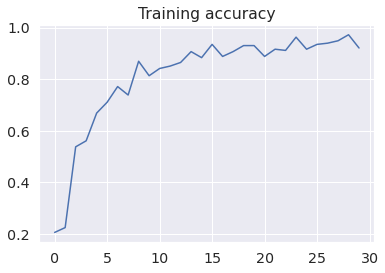

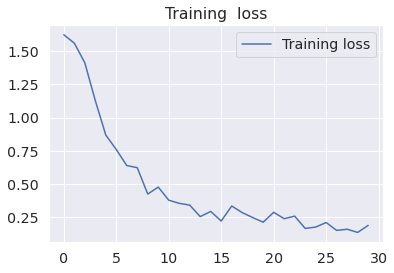

In [ ]:
### plot the accuracy and loss variation per epoch

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs , acc , 'b' , label = 'Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs , loss , 'b' , label = 'Training loss')
plt.title('Training  loss')
plt.legend()

plt.show()

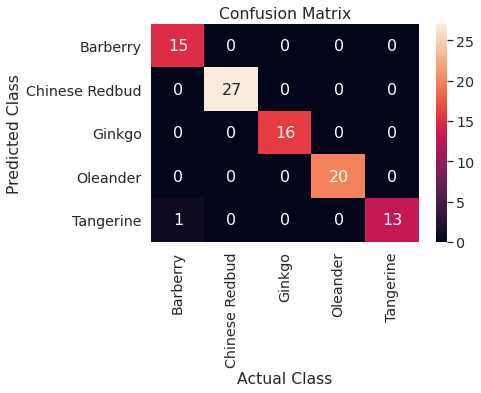

In [ ]:
### plot the confusion matrix and classification report
import seaborn as sn
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(testData)

y_pred = (predictions > 0.5)
matrix = confusion_matrix(testLabels.argmax(axis=1), y_pred.argmax(axis=1))

df_cm = pd.DataFrame(matrix,index= categories, columns=categories)
sn.set(font_scale=1.3) # for label size
plt.title(" Confusion Matrix ")
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()

In [ ]:
print('\n\n\n Classification Report \n\n')
print(classification_report(testLabels, y_pred, target_names=categories))




 Classification Report 


                precision    recall  f1-score   support

      Barberry       0.93      0.93      0.93        15
Chinese Redbud       1.00      1.00      1.00        27
        Ginkgo       1.00      1.00      1.00        16
      Oleander       1.00      1.00      1.00        20
     Tangerine       1.00      0.93      0.96        14

     micro avg       0.99      0.98      0.98        92
     macro avg       0.99      0.97      0.98        92
  weighted avg       0.99      0.98      0.98        92
   samples avg       0.98      0.98      0.98        92



Saving 2432.jpg to 2432.jpg


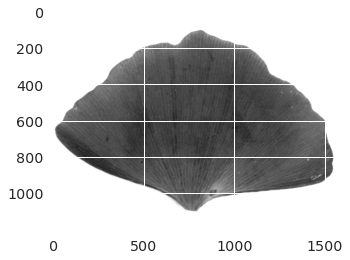

(180, 180) 


(1, 180, 180, 1) 



 Name of the leaf is : Ginkgo


In [ ]:
### import the files and get the unknown image on runtime 

from google.colab import files
uploaded = files.upload()

### preprocess the unknown image
### predict the label for test image
for fn in uploaded.keys():
  test_path = '/content/'+fn
  image = cv2.imread(test_path,cv2.IMREAD_GRAYSCALE)
  plt.imshow(image, cmap='gray')
  plt.show()

  test_feature = cv2.resize(image, (SIZE,SIZE))
  print(test_feature.shape ,'\n\n')

  test_feature = test_feature.reshape(-1,test_feature.shape[0],test_feature.shape[1],1)
  print(test_feature.shape ,'\n\n')

  test_prediction = model.predict(test_feature)

  predicted_index = np.argmax(test_prediction)

  predicted_class = categories[predicted_index]

  print("\n Name of the leaf is : "+predicted_class)

  #print(test_prediction)
  #print("\n Barberry ={:.10f}%, \n Chinese Redbud ={:.10f}%,\n Ginkgo={:.10f}%, \n Oleander={:.10f}%, \n Tangerine ={:.10f}%".format(test_prediction[0][0]*100, test_prediction[0][1]*100,test_prediction[0][2]*100,test_prediction[0][3]*100,test_prediction[0][4]*100))



In [ ]:
# Extracts the outputs of all layers
layer_outputs = [layer.output for layer in model.layers[0:]] 
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 


In [ ]:
print(model.layers)
print(len(model.layers))

[<keras.layers.convolutional.Conv2D object at 0x7f7f66695278>, <keras.layers.pooling.MaxPooling2D object at 0x7f7f66695518>, <keras.layers.convolutional.Conv2D object at 0x7f7fd03b2748>, <keras.layers.pooling.MaxPooling2D object at 0x7f7f6668c3c8>, <keras.layers.convolutional.Conv2D object at 0x7f7f691acb00>, <keras.layers.pooling.MaxPooling2D object at 0x7f7f66694e48>, <keras.layers.core.Flatten object at 0x7f7fd03c1cc0>, <keras.layers.core.Dense object at 0x7f7f68ee8fd0>, <keras.layers.core.Dense object at 0x7f7f66695470>]
9


In [ ]:
activations = activation_model.predict(test_feature) 
# Returns a list of five Numpy arrays: one array per layer activation

(1, 176, 176, 16)


Convolution Layer 1




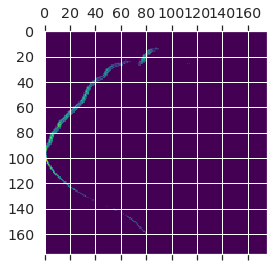

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)
print("\n\nConvolution Layer 1\n\n")
plt.matshow(first_layer_activation[0, :, :,4], cmap='viridis')

(1, 58, 58, 16)


Max Pooling Layer 1




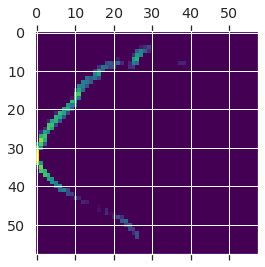

In [ ]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)
print("\n\nMax Pooling Layer 1\n\n")
plt.matshow(second_layer_activation[0, :, :, 4], cmap='viridis')

(1, 55, 55, 32)


Convolution Layer 2




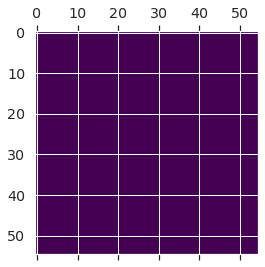

In [ ]:
third_layer_activation = activations[2]
print(third_layer_activation.shape)
print("\n\nConvolution Layer 2\n\n")
plt.matshow(third_layer_activation[0, :, :, 4], cmap='viridis')

(1, 18, 18, 32)


Max Pooling Layer 2




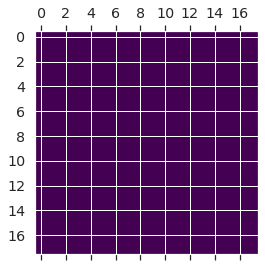

In [ ]:
fourth_layer_activation = activations[3]
print(fourth_layer_activation.shape)
print("\n\nMax Pooling Layer 2\n\n")
plt.matshow(fourth_layer_activation[0, :, :, 4], cmap='viridis')

(1, 16, 16, 64)


Convolution Layer 3




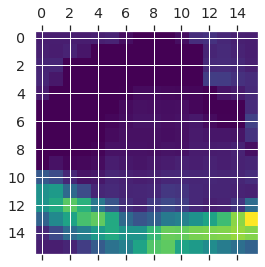

In [ ]:
fifth_layer_activation = activations[4]
print(fifth_layer_activation.shape)
print("\n\nConvolution Layer 3\n\n")
plt.matshow(fifth_layer_activation[0, :, :, 1], cmap='viridis')

(1, 8, 8, 64)


Max Pooling Layer 3




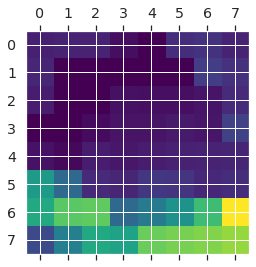

In [ ]:
sixth_layer_activation = activations[5]
print(sixth_layer_activation.shape)
print("\n\nMax Pooling Layer 3\n\n")
plt.matshow(sixth_layer_activation[0, :, :, 1], cmap='viridis')

(1, 4096)


Flatten layer




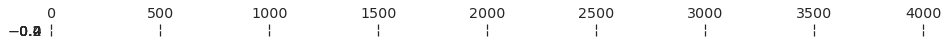

In [ ]:
seventh_layer_activation = activations[6]
print(seventh_layer_activation.shape)
print("\n\nFlatten layer\n\n")
plt.matshow(seventh_layer_activation[:4], cmap='viridis')

(1, 64)


Fully Connected layer 1




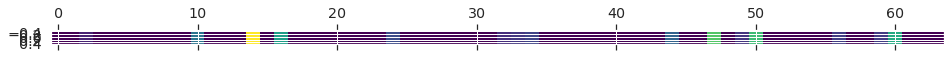

In [ ]:
eighth_layer_activation = activations[7]
print(eighth_layer_activation.shape)
print("\n\nFully Connected layer 1\n\n")
plt.matshow(eighth_layer_activation[: 4], cmap='viridis')

(1, 5)


Classification layer 




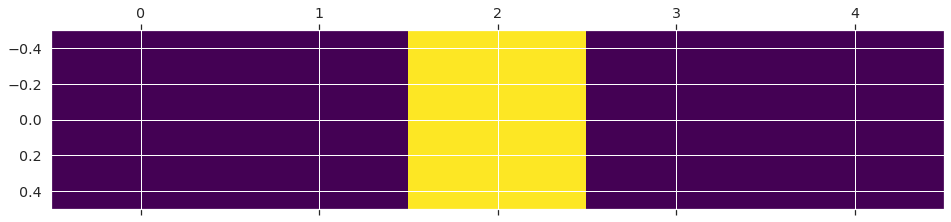

In [ ]:
nineth_layer_activation = activations[8]
print(nineth_layer_activation.shape)
print("\n\nClassification layer \n\n")
plt.matshow(nineth_layer_activation[: 4], cmap='viridis')

**VISUVALIZING ALL CHANNELS IN ALL LAYERS**

In [ ]:
layer_names =[]
for layer in model.layers[:6]:
  layer_names.append(layer.name)

image_per_row = 16

for layer_name,layer_activation in zip(layer_names,activations):
  n_features = layer_activation.shape[-1]

  size = layer_activation.shape[1]

  n_cols = n_features//image_per_row
  display_grid = np.zeros((size * n_cols , image_per_row * size))

  for col in range(n_cols):
    for row in range(image_per_row):
      channel_image = layer_activation[ 0 , : , : , col * image_per_row + row ]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image , 0 , 255).astype('uint8')
      
      display_grid[col * size : (col+1) * size , row * size : (row+1) * size ] = channel_image

  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0] ))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid , aspect = 'auto' , cmap = 'viridis')

